In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
g = 9.81  # Acc due to gravity
L = 1.0   # Length of the string
m = 0.1   # Mass
k = 1.0

In [3]:
x0 = 0.0  # Initial vertical position of the pivot (m)
v0 = 0.1  # Initial velocity of the pivot (m/s)
theta1_0 = np.pi / 6  # Initial angle of the left ball (rad)
theta2_0 = np.pi / 6  # Initial angle of the right ball (rad)
omega1_0 = 0.0  # Initial angular velocity of the left ball (rad/s)
omega2_0 = 0.0  # Initial angular velocity of the right ball (rad/s)

In [4]:
def equations(t, y):
    x, v, theta1, omega1, theta2, omega2 = y
    
    # Angular accelerations
    alpha1 = -g / L * np.sin(theta1) - (k / m) * (x - L * np.cos(theta1))
    alpha2 = -g / L * np.sin(theta2) - (k / m) * (x - L * np.cos(theta2))
    
    # Equations of motion
    dxdt = v
    dvdt = -k / m * (x - L * (np.cos(theta1) + np.cos(theta2)))
    dtheta1dt = omega1
    domega1dt = alpha1
    dtheta2dt = omega2
    domega2dt = alpha2
    
    return [dxdt, dvdt, dtheta1dt, domega1dt, dtheta2dt, domega2dt]

In [5]:
# Time for simulation
t_span = (0, 10)
y0 = [x0, v0, theta1_0, omega1_0, theta2_0, omega2_0]

In [6]:
# equations
sol = solve_ivp(equations, t_span, y0, t_eval=np.linspace(*t_span, 500))

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

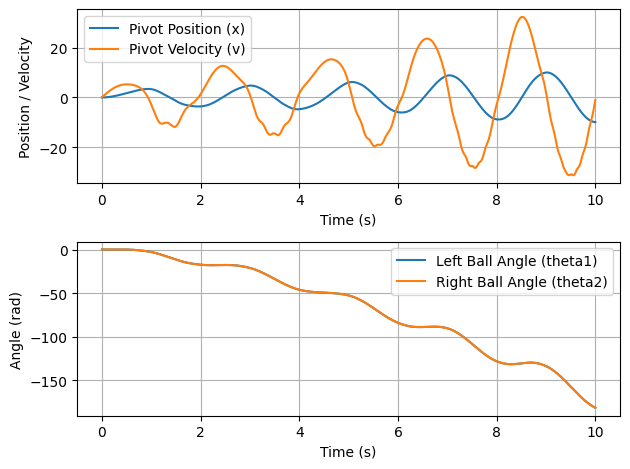

In [7]:


plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label='Pivot Position (x)')
plt.plot(sol.t, sol.y[1], label='Pivot Velocity (v)')
plt.xlabel('Time (s)')
plt.ylabel('Position / Velocity')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(sol.t, sol.y[2], label='Left Ball Angle (theta1)')
plt.plot(sol.t, sol.y[4], label='Right Ball Angle (theta2)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()